建立的SVM模型为：
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
预测前20个结果为：
 [1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1]


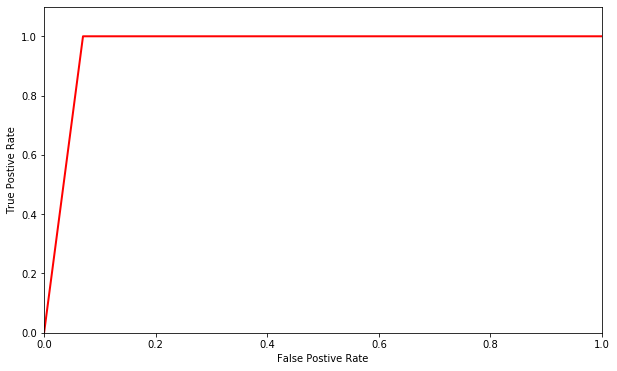

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
cancer_data = cancer['data']
cancer_target = cancer['target']
cancer_names = cancer['feature_names']

## 将数据划分为训练集测试集
cancer_data_train,cancer_data_test, \
cancer_target_train,cancer_target_test = \
train_test_split(cancer_data,cancer_target,
      test_size = 0.2,random_state = 22)

## 数据标准化
stdScaler = StandardScaler().fit(cancer_data_train)
cancer_trainStd = stdScaler.transform(cancer_data_train)
cancer_testStd = stdScaler.transform(cancer_data_test)

## 建立SVM模型
svm = SVC().fit(cancer_trainStd,cancer_target_train)
print('建立的SVM模型为：\n',svm)


## 预测训练集结果
cancer_target_pred = svm.predict(cancer_testStd)
print('预测前20个结果为：\n',cancer_target_pred[:20])


from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

## 求出ROC曲线的x轴和y轴
fpr, tpr, thresholds = \
roc_curve(cancer_target_test,cancer_target_pred)
plt.figure(figsize=(10,6))
plt.xlim(0,1) ##设定x轴的范围
plt.ylim(0.0,1.1) ## 设定y轴的范围
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr,tpr,linewidth=2, linestyle="-",color='red')
plt.show()